El presente artículo es un tutorial que explica cómo optimizar los pesos de activos financieros dentro de un portafolio de inversión utilizando python.  A pesar del título, en este artículo se presentan también cosas como: obtener datos de mercado desde internet, manipulación de dataframes (tablas de datos), operaciones aritméticas con fechas, multiplicación de matrices, simulaciones de Montecarlo, entre otras.

Cabe mencionar que para entender este documento en su totalidad,  son necesarios conocimientos previos de finanzas, álgebra lineal y programación en python. Sin embargo, he realizado  esfuerzo para hacer entendible este artículo a la mayor cantidad de personas, incluso a quienes pudieran no contar con estos conocimientos previos.

Antes de empezar es necesario explicar algunos temas de forma. El código que se presenta está redactado en inglés, esto se debe ya que al estar los lenguajes de programación construidos en inglés, caracteres como la "ñ", vocales con tildes o con diéresis (ü), hacen que el código pueda eventualmente fallar, por lo que para evitar estos posibles fallos hay dos alternativas: escribir en español evitando estos caracteres (y en consecuencia cometer faltas de ortografía), o escribir el código en inglés. Esta última es la solución que escogí porque es también una buena práctica a la hora de programar.

Una vez mencionado lo anterior podemos empezar con el tutorial. Primero hay que importar las librerías necesarias, si queremos importar una librería completa, utilizamos la palabra reservada de python "import", seguida del nombre de la librería, además podemos asignarle a la librería un diminutivo para que el código sea más fácil de escribir, esto se hace con la palabra reservada "as" y continuada por el diminutivo correspondiente. Por último, si queremos un modulo o función específico de una librería, entonces utilizamos la palabra reservada "from" seguida del nombre de la librería para luego con "import" llamar al módulo específico.

Tomando en cuenta lo anterior, las librerías que utilizaremos son: Pandas, Numpy, Matplotlib, Seaborn, Pandas Data Reader, Datetime,  Dateutil y Scipy. La forma de importarlas será la siguiente:

In [64]:
# Libraries
import pandas as pd # to manipulate dataframes
import numpy as np # to resolve lineal algebra problems
import datetime as dt # to manage datetime data
import matplotlib.pyplot as plt # to plot plot our results
import seaborn as sns # to plot plot our results
from pandas_datareader import DataReader as wb # to import market data from internet
from dateutil.relativedelta import relativedelta # to manage datetime data
from scipy.optimize import minimize # to resolve optimization problems

# Obtener datos desde internet

En este ejercicio utilizaremos un portafolio compuesto por las acciones de *Apple, Tesla, Amazon, Facebook y Microsoft*, cuyos tickers son respectivamente: **AAPL, TSLA, AMZN, FB y MSFT**. Para obtener los precios de cierre diarios de estas acciones utilizaremos la función "DataReader" importada como "wb" de la librería "pandas_datareader".

El codigo para importar los precios es el siguiente:

In [65]:
# Get market data
start = dt.datetime.now() - relativedelta(years=5)
end = dt.datetime.now()
tickers = ['AAPL', 'TSLA', 'AMZN', 'FB', 'MSFT']
df = wb(tickers,'yahoo',start,end)['Close']


La función "DataReader" recibe como inputs el nombre de la información solicitada, lo que en nuestro caso es la variable *tickers* la cual es una lista que contiene los tickers de las de las acciones de nuestro portafolio. Posteriormente recibe la fuente de donde busca la información, nosostros queremos sacar la información desde **Yahoo Finance**, por que le pasamos a la función el dato **'yahoo'** como *string*. Por último, la función nos pide una fecha de inicio y una fecha de termino, las cuales pueden ser datos de tipo *string* o *datetime*, estas fechas son la ventana de tiempo sobre la cual queremos los datos de mercado de la acciones.

Para la fecha de inicio creamos la variable **start**, la cual es de tipo *datetime* y corresponde al día de hoy menos 5 años exactos. Para esto usamos la funcion "datetime.now()" de la librería "datetime" importada como "dt", esta función nos entrega el dia en que nos encontramos cuando ejecutamos el codigo. Al día de hoy le restamos 5 años exactos con la fucnión "relativedelta" de la librería "dateutil". Para la variable **end** solo utilizamos la función "datetime.now()'.

Lo anterior es interesante porque tenemos un código flexible que simpre entrega los últimos 5 años de datos hacia atrás desde la fecha en que quiero hacer el análisis. Como último input, definimos la variable *tickers*, la cual es una lista que contine cada ticker de las acciones de nuestro portafoliio, donde cada dato es de tipo *string*.

Podemos realizar un *print* del dataframe resultante para ver como luce.

In [66]:
print(df.head(7))

Symbols          AAPL       TSLA        AMZN          FB       MSFT
Date                                                               
2016-10-14  29.407499  39.301998  822.960022  127.879997  57.419998
2016-10-17  29.387501  38.792000  812.950012  127.540001  57.220001
2016-10-18  29.367500  39.820000  817.650024  128.570007  57.660000
2016-10-19  29.280001  40.712002  817.690002  130.110001  57.529999
2016-10-20  29.264999  39.820000  810.320007  130.000000  57.250000
2016-10-21  29.150000  40.018002  818.989990  132.070007  59.660000
2016-10-24  29.412500  40.551998  838.090027  133.279999  61.000000


Como se puede apreciar la función nos devuelve un *dataframe* donde cada columna es el precio de cierre diario de cada acción y el índice son las fechas de cada día. Cabe destacar que la función por defecto nos devuelve más atributos de las acciones como: *volumen transado, mayor precio diario, menor precio diario y precio de cierre ajustado por dividendos*. Sin embargo, a nosotros nos interesa solo el precio de cierre, por lo que después de escribir la función agregamos **"['Close']"** para indicar que, de todos los atributos, solo nos retorne el precio de cierre. Si quisieramos trabajar con el precio ajustado por dividendos, entonces debemos agregrar **"['Adj Close']"**.

# Retornos discretos y retornos logarítmicos

Ya tenemos nuestro *dataframe* con cinco años de precios diarios para las acciones de nuestro portafolio, pero para el análisis que vamos a realizar necesitamos los retornos diarios de las acciones. El retorno diario no es más que la variación porcentual entre el precio de cada día versus el precio del día anterior, si por ejemplo, el precio de hoy fuera 120 y el de ayer fuera 100, entonces el retorno diario sería 20%. El calculo sería simplemente (120/100) - 1.

Los retornos calculados con la forma descrita arriba se conocen como retornos discretos; sin embargo,  hay otros retornos conocidos como retornos continuos, los cuales podemos obtener con la primera diferencia logarítmica. Si utilizamos los mismos precios del ejemplo anterior, el retorno continuo seria: ln(120/100) = 18.23% app.

Hay situaciones donde es mejor utilizar retornos logaritmos ,como cuando se hacen regresiones lineales entre series de tiempo (ej: cálculo del beta de mercado de una acción). Para este modelo en concreto, la utilización de un retorno por sobre otro no genera mayores beneficios, por lo que explicaré como calcular ambos retornos pero realizaré los cálculos posteriores con los retornos logarítmicos.

Para los retornos discretos tenemos que dividir cada fila del *dataframe* con la fila anterior y restarle 1, el resultado podemos guardarlo en una variable llamada "ret". Lo anterior se hace así:

In [67]:
ret = df/df.shift(1) - 1
print(ret.head(7))

Symbols         AAPL      TSLA      AMZN        FB      MSFT
Date                                                        
2016-10-14       NaN       NaN       NaN       NaN       NaN
2016-10-17 -0.000680 -0.012976 -0.012163 -0.002659 -0.003483
2016-10-18 -0.000681  0.026500  0.005781  0.008076  0.007690
2016-10-19 -0.002979  0.022401  0.000049  0.011978 -0.002255
2016-10-20 -0.000512 -0.021910 -0.009013 -0.000845 -0.004867
2016-10-21 -0.003930  0.004972  0.010699  0.015923  0.042096
2016-10-24  0.009005  0.013344  0.023321  0.009162  0.022461


Se puede apreciar que el código es bastante parecido a lo hecho con el ejemplo de los precios 120 y 100, en este caso lo que hacemos con el método "shift(1)" es dividir cada fila del dataframe con la fila inmediatamente anterior, luego restamos uno. Con esto dejamos de tener precios y pasamos a tener números decimales que representan las variaciones diarias de los precios.

Es necesario hacer especial atención en la primera fila donde todos los valores son de tipo "NaN", esto es un valor nulo, y la razón de que la primera fila tenga valores nulos es porque al momento de dividir cada fila por la fila anterior, la primera fila no tuvo una fila anterior con la que dividirse, por lo que el resultado de esa división fue nulo. Para eliminar esa fila se puede hacer lo siguiente:

In [68]:
ret = df/df.shift(1) - 1
ret.dropna(inplace=True)
print(ret.head(7))

Symbols         AAPL      TSLA      AMZN        FB      MSFT
Date                                                        
2016-10-17 -0.000680 -0.012976 -0.012163 -0.002659 -0.003483
2016-10-18 -0.000681  0.026500  0.005781  0.008076  0.007690
2016-10-19 -0.002979  0.022401  0.000049  0.011978 -0.002255
2016-10-20 -0.000512 -0.021910 -0.009013 -0.000845 -0.004867
2016-10-21 -0.003930  0.004972  0.010699  0.015923  0.042096
2016-10-24  0.009005  0.013344  0.023321  0.009162  0.022461
2016-10-25  0.005100 -0.002071 -0.003472 -0.007428 -0.000164


La función "dropna()", como su nombre permite intuir, elimina del dataframe todas las filas que continen datos de tipo NaN.

Para obtener los retornos continuos (los cuales se utilizarán en lo que sigue del tutorial), también se utiliza la función "shift(1)" para dividir cada fila con la fila anterior, además, se utiliza la función "log" de la librería Numpy, importada al inicio como "np", esta función nos permite calcular el logaritmo natural de lo coloquemos dentro. Así, los retornos logarítmicos se obtienen como:

In [69]:
log_ret = np.log(df/df.shift(1)).dropna()
print(log_ret.head(7))

Symbols         AAPL      TSLA      AMZN        FB      MSFT
Date                                                        
2016-10-17 -0.000680 -0.013061 -0.012238 -0.002662 -0.003489
2016-10-18 -0.000681  0.026155  0.005765  0.008044  0.007660
2016-10-19 -0.002984  0.022154  0.000049  0.011907 -0.002257
2016-10-20 -0.000512 -0.022154 -0.009054 -0.000846 -0.004879
2016-10-21 -0.003937  0.004960  0.010643  0.015798  0.041234
2016-10-24  0.008965  0.013256  0.023054  0.009120  0.022212
2016-10-25  0.005087 -0.002074 -0.003478 -0.007456 -0.000164


# Teoría del portafolio y álgebra lineal

## Criterios y supuestos sobre portafolios de inversión

Cuando invertimos en el mercado financiero, podemos invertir en un solo activo (por ejemplo comprar solo la acción de Apple) o invertir en varias activos (como es nuestro caso en que invertimos en las acciones de varias empresas tecnológicas). A lo anterior se le conoce como portafolio de inversión, y es básicamente la cantidad de activos financieros en la que invertimos un monto determinado de dinero. Lo importante a tener en cuenta es que el dinero disponible para invertir en el portafolio es independiente de la cantidad de activos que haya en el portafolio, por lo tanto, podemos afirmar que el portafolio siempre tiene el 100% de la inversión.

Si tenemos un portafolio compuesto por una única empresa, entonces el peso de esa acción en el portafolio es del 100%, ya que todo el dinero disponible para invertir en el portafolio está en esa única acción. Sin embargo, si el portafolio está compuesto por dos acciones, estas no necesariamente tendrán un peso de 50% cada una dentro del portafolio, ya que en la primera acción se podría invertir más que en la segunda, y viceversa. Por lo tanto, los pesos individuales de cada activo dentro de un portafolio dependen exclusivamente del criterio del inversionista de invertir más en ciertos activos que en otros.

Pese a que el criterio de inversión depende solo del inversionista, podemos afirmar que la suma de los pesos individuales debe sumar 1 (100%). Además, vamos a suponer que cada peso individual no puede ser un número negativo (menor a cero), a pesar de que esto pueda parecer intuitivo, en la práctica es posible que el peso de un activo sea negativo, esto ocurre si se toma una "posición corta" en el activo en particular. Sin entrar en mucho detalle, podemos entender una posición corta como la venta de un activo el cual esperamos re comprar barato en el futuro. Por lo tanto, sabemos que para cada activo de nuestro portafolio tendremos un determinado peso, donde se cumplen dos restricciones: la suma de los pesos individuales suman 1 y cada peso individual debe ser mayor a cero.

## Multiplicación de matrices

Ya tenemos las restricciones del portafolio ahora debemos saber cómo calcular la rentabilidad esperada anual y la volatilidad anual. Para hacer esto debemos entender cada dato como un vector o como una matriz, específicamente necesitamos tres datos en concreto: vector de pesos, vector de retornos esperados y la matriz de varianza - covarianza.

El vector de pesos será de tamaño Nx1, donde "N" es la cantidad de filas y "1" es la cantidad de columnas. La cantidad de filas será igual a cantidad de activos dentro del portafolio. Cabe destacar que este vector debe cumplir con las restricciones antes mencionadas para los pesos de un portafolio.

Llamemos "W" al vector de pesos de un portafolio compuesto por 4 acciones cuyos retornos son aleatorios, este vector lo podemos crear con la función "random.rand()", la cual nos devuelve un número entre cero y uno, por lo que cumple con la segunda restricción. Además, podemos forzar la restricción de que la suma de los pesos sea uno, dividiendo cada peso por la suma total de los pesos. Por último con el atributo "shape" de los array de numpy, podemos ver el tamaño del vector creado.

In [70]:
W = np.random.rand(4)
W= W/W.sum()
print('Vector of weights')
print(W)
print('----')
print('Sum of individuals weights')
print(W.sum())
print('----')
print('Vector shape')
print(W.shape)

Vector of weights
[0.26666835 0.41277841 0.06846584 0.2520874 ]
----
Sum of individuals weights
1.0
----
Vector shape
(4,)


La rentabilidad esperada también será un vector de tamaño Nx1 donde cada dato será el promedio de las rentabilidades diarias del periodo de tiempo que definamos, en nuestro caso son los cinco años de datos diarios que descargamos desde Yahoo. Este vector no tiene las restricciones del vector de pesos.

Si seguimos con ejemplo anterior llamaremos "Ret" al vector de retorno. Podemos generar un vector de retornos aletaros con la formula "random.standard_normal()", la cual nos devuelve números de una distribución normal estandar. Como este vector no tiene las restricciones del vector de pesos entonces puede tomar valores de decimales positivos o negativos.

In [71]:
Ret = np.random.standard_normal(4)
print('Vector of expected returns')
print(Ret)
print('----')
print('Sum of indivial retuns')
print(Ret.sum())
print('----')
print('Shape of vector')
print(Ret.shape)

Vector of expected returns
[ 1.73774355  1.30493828 -0.00880432  0.85650984]
----
Sum of indivial retuns
3.890387356681964
----
Shape of vector
(4,)


Tambien podemos obtener el vector de retornos del dataframe de retornos que calulalos anteriormente, para esto solo hay que calcular el retorno promedio de cada acción, esto se puede hacer con la funcion "mean()" de los dataframe de pandas. Ademmás, con el método "values" podemos convertir el dataframe resultante en un array de numpy. Esto sería así:

In [72]:
Ret_2 = log_ret.mean().values
print('Vector of expected returns')
print(Ret_2)
print('----')
print('Sum of indivial retuns')
print(Ret_2.sum())
print('----')
print('Shape of vector')
print(Ret_2.shape)
print('----')
print('Data type')
print(type(Ret_2))

Vector of expected returns
[0.00126003 0.00241431 0.00110503 0.0007495  0.00131792]
----
Sum of indivial retuns
0.006846794545927697
----
Shape of vector
(5,)
----
Data type
<class 'numpy.ndarray'>


Por último, la matriz de varianza - covarianza será de tamaño NxN, es decir, hay "N" filas y "N" columnas y donde cada dato de la matriz será la covarianza de un activo específico con respecto, dentro del periodo de tiempo definido (cinco años en nuestro caso). Para calcular la matriz de varianza - covarianza de nuestro *dataframe* de retornos solo basta con usar la función "cov()" de los pandas dataframe. Esto sería así

In [73]:
Cov = log_ret.cov()
print(Cov)
print('----')
print(Cov.shape)

Symbols      AAPL      TSLA      AMZN        FB      MSFT
Symbols                                                  
AAPL     0.000363  0.000297  0.000225  0.000241  0.000244
TSLA     0.000297  0.001380  0.000264  0.000259  0.000276
AMZN     0.000225  0.000264  0.000343  0.000239  0.000227
FB       0.000241  0.000259  0.000239  0.000436  0.000229
MSFT     0.000244  0.000276  0.000227  0.000229  0.000298
----
(5, 5)


Como se puede apreciar, se hizo especial hincapié en los tamaños de los vectores y matrices, esto es porque para poder realizar operaciones algebráicas entre matrices y vectores, el tamaños es relevante. A partir de ahora solo se hablará de matrices pero todo es equivalente a vectores, recordar que un vector no es mas que una matriz de tamaño Nx1.

Para este tutorial solo nos va a interesar la mulplicación de matrices (producto punto para los más puristas) y transponer matrices. Esta última (trasponer) no es más que intercambiar filas por columnas, es decir, si el tamaño de de la matrix es NxM (donde N son filas y M columnas), entonces la matriz transpuesta será de tamaño MxN.

Sobre la multiplicación de matrices el orden de los factores es importante, el criterio es bastante simple, las columnas de la matriz de la izquierda tienen que ser iguales a las filas de las columnas de la derecha. Por lo tanto, si queremos multiplicar el vector de retornos con el vector de pesos, no sería posible ya que amobos vectores son de Nx1, por lo que a la hora de las columnas del que se multiplique por las izquierda no coinciden con las filas de la matrix que se multiplique por la derecha, a menos que uno de los dos se transponga.

Para multiplicar matrices podemos usar la función "dot" de la librería numpy. A continuación se muestra un ejemplo de como multiplicar matrices.

In [74]:
matriz_1 = np.random.standard_normal(size=(3,2))
matriz_2 = np.random.standard_normal(size=(3,2))
result = np.dot(matriz_1.T,matriz_2)
print('Shape of matriz1: ' + str(matriz_1.shape))
print('Shape of matriz2: ' + str(matriz_2.shape))
print('---------------------------------')
print('Incorrect matrix multiplication')
print('matriz1 * matriz 2 = ' + str(matriz_1.shape) + ' * ' + str(matriz_2.shape))
print('---------------------------------')
print('Correct matrix multiplication')
print('matriz1.T * matriz2 = ' + str(matriz_1.T.shape) + ' * ' + str(matriz_2.shape))
print('\nMultiplication Results')
print(result)
print('\nResult shape ' + str(result.shape))

Shape of matriz1: (3, 2)
Shape of matriz2: (3, 2)
---------------------------------
Incorrect matrix multiplication
matriz1 * matriz 2 = (3, 2) * (3, 2)
---------------------------------
Correct matrix multiplication
matriz1.T * matriz2 = (2, 3) * (3, 2)

Multiplication Results
[[-0.23839295  1.51865885]
 [ 0.65881857 -3.81871833]]

Result shape (2, 2)


## Retorno esperado y volatilidad

Ahora que conocemos el vector de pesos, vector de retornos, matriz de varianza - covarianza y entendemos las restricciones para multplicar matrices, podemos ver las formulas para el retorno esperado del portafolio y la volatilidad del portafolio.

El retorno esperado de un portafolio no es más que la suma de los retornos individuales de cada acción del portafolio, ponderados por su peso en este. Para poder hacer este cáculo tenemos que multiplicar el vector de pesos traspuestos por el vector de retornos esperados. Hay que recordar que el vector de retornos esperados lo podemos estimar como el promedio de los retornos individuales de cada activo en un periodo de tiempo determinado.

La volatilidad de un portafolio se suele medir como la desviación estandar de los retornos esperados; sin embargo, esta no se puede calcular como la suma ponderada de las desviaciones individuales debido a la correlación estadística que hay entre las acciones del portafolio. Para calcular la desviación estandar primero de debe estimar la varianza del portafolio, para posteriormente obetener la desviación estandar como la raiz cuadrada de la varianza.

Si mantenemos la notación antes descrita y llamamos "W" al vector de pesos, "Ret" al vector de retornos esperados y "Cov" a la matrix de varianza - covarianza, además, consideramos a "W.T" como la matriz transpuesta de pesos, entonces las formulas serían las siguiente:


-    *Retorno esperado = W.T(1xN) * Ret(Nx1)*

-    *Varianza = W.T(1xN) * Cov(NxN) * W(Nx1)*

-    *Desviación estandar (volatilidad) = √varianza*


En nuestro caso particular vamos a trabajar con datos diarios, por lo que para obtener el retorno esperado anual y la volatilidad anual hay que hacer el siguiente ajuste a las formulas:

-    *Retorno esperado anual = W.T(1xN) * Ret(Nx1) * 252*

-    *Varianza = W.T(1xN) * Cov(NxN) * W(Nx1)*

-    *Desviación estandar (volatilidad) anual = √varianza * √252*

¿Por qué 252? La razón es bastante simple, aproximadamente hay 252 días hábiles en un año, y como los mercados financieros solo funcionan los días hábiles, entonces sería incorrecto multiplicar por 365. También uno se podría preguntar por qué el retorno se multiplica por 252 pero la volatilidad se multiplica por la raíz cuadrada de 252. La explicación de esto es un poco más compleja, pero de forma resumida lo que sucede es que nosotros estimamos los retornos con la media, la cual crece linealmente en el tiempo, por lo que si quisiéramos la media mensual bastaría con multiplicar la media diaria por 30 (obviamente consideramos todos los días del mes y no solo los hábiles). Por otro lado, la volatilidad la estimamos con la desviación estándar, la cual crece como la raíz cuadrada del tiempo, por eso se multiplica por la raíz cuadrada de 252.

## Ratio de Sharpe

Una vez que tenemos el retorno esperado anual y la volatilidad anual, podemos calcular el ratio de sharpe, el cual se calcula como:

-   *Sharpe* = (Retorno esperado anual - Tasa libre de riesgo anual) / Volatilidad anual

Este parámetro nos indica la relación riesgo versus retorno por sobre la tasa libre de riesgo de un portafolio, este criterio es el que utilizaremos posteriormente para optimizar el portafolio. Sobre la tasa libre riesgo, la podemos entender como un activo financiero que ofrece una rentabilidad sin riesgo alguno, sin emargo, en la practica no hay un consenso claro sobre cuál es el activo libre de riesgo de una economía (o si siquiera existe realmente), a pesar de esto} se suele estimar con la tasas de interés de instrumentos financieros con un riesgo de crédito (riesgo de no pago) muy bajo, como lo pueden ser bonos de gobierno o de bancos centrales.

Básicamente el problema que queremos resolver es cuáles son los pesos óptimos de los activos del portafolio, para esto buscaremos un vector de pesos que nos permita obtener el máximo ratio de sharpe.

# Optimización de portafolio

## Crear funciones

El primer paso para poder encontrar el portafolio óptimo que maximice el ratio de sharpe es crear las siguientes funciones:

In [75]:
# Functions
def financials(weights=[]):
    mean = log_ret.mean() # vector of expected returns
    cov = log_ret.cov() # covariance matrix
    w = np.array(weights) # vector of weights
    ret = np.dot(mean.T,w) * 252 # annual expected return of portfolio
    std =  np.sqrt(np.dot(w.T,np.dot(cov * 252, w))) # annual expected volatility of portfolio returns
    return np.array([ret,std,ret/std]) #output

def max_sharpe(weights=[]):
    return -financials(weights)[2]

Ambas funciones reciblen como input una variable llamada *weights* la cual es una lista con los pesos idividuales para cada acción. No importta qué ponderación haya para las acciones, lo único relevante es que estos cumplan las dos restricciones vistas en el punto anteriormente, es decir, que la suma de los pesos sea 1 y que cada peso indivudual sea mayor a cero.

La primera función llamada "financials" hace todo lo visto en el apartado anterior, crea el vector de retornos esperados como el promedio de los retornos individuales de cada acción, calcula la matriz de varianza - covarianza, utiliza el input *weights* para crear el vector de pesos y utiliza estas tres variables para calcular el retorno esperado anual del portafolio y la desviación estandar (volatilidad) anual del retorno del portaolio. Finalmente, nos retorna un vector donde el primer dato es retornno esperado anual, el segundo dato es la desviación estandar anual y el tercer dato es la divición del primero sobre el segundo, es decir, el ratio de sharpe.

La segunda función llamada "max_sharpe" utiliza a la primera (financials), y recupera solo el tercer elemento del retorno de la función 1, es decir, recupera solo el ratio de sharpe negativo (lo multiplica por -1). Hay que recordar que en las estructura de datos los indices parten desde cero, por lo el primer dato es el cero, en el caso de la primera función, esta retorna un vector con tres datos, siendo el último el ratio de sharpe, como el primer dato tiene indice cero, el segundo dato tendrá indice 1 y el tercer dato tendrá indice 2.

## Optimización

Con la funciones anteriores creadas ya podemos optimizar el portafolio, para este proceso utilizaremos la función "minimize" que importamos al inicio del modulo "optimize" de la librería "scipy". Esta funcción nos permite minimizar el resultado de una función objetivo creada previamente, optimizando el input de dicha función, en nuestro caso queremos maximizar el ratio de sharpe optimizando los pesos del portafolio. Sin embargo, la libería scipy no tiene una función "maximize" por lo que para problemas de maximización dedemos minimizar el número negativo, en este caso sería minimizar el ratio de sharpe negatio. Es por esto que la segunda función , "max_sharpe", retorna el ratio de sharpe negativo.

Además de una función obejtivo para minimizar (maximizar en nuestro caso), la función "minimize" también nos pide restricciónes y límites al input de la función objetivo.

A continuación se muestran todos los inputs necesarios para realizar la optimiación:

In [76]:
# Optimization inpputs
cons = {'type':'eq','fun':lambda x: np.sum(x) -1}
bnds = tuple((0,1) for x in range(len(tickers)))
weights = len(tickers) * [1./len(tickers)]

La primera variable llamada "cons" es la restricción que obliga a que la suma de los pesos indivuales de las acciones sea 1, para esto se crea un diccionario donde el dato de tipo *string* "type", lo emparejamos al *string* "eq", con esto le indicamos a la función "minimize" que la restricción es una igualdad. Luego creamos la *string* "fun" y la emparejamos a una función que calcule la restricción, en nuestro caso como la restricción es simple basta con crear una función *lambda* que reciva la variable "x" y que calcule la suma de "x" y le reste 1. Con esto último inidicamos la restricción es que la suma del imput debe ser cero.

La segunda variable llamada "bnds"  indica los límites del input, en nuestro caso los pesos individuales deben estar entre cero y uno, para esto creamos una variable de tipo tupla, donde indicamos los límites cero y uno y agregamos un *bucle for* para que este límite se considere en cada elemento del vector de pesos.

Para poder entender bien las dos variables previamente creadas se necesita concimiento sobre en los tipos de estructuras de datos de python, lamentablemente explicar los diccionarios, tuplas y funciones *lambda*, crearía un nivel de complejidad se que escapa del objetivo de este documento, el cual ya es extenso por las explicaciones intermedias sobre python, finanzas y álgebra lineal. Por lo que es lo único putno que no será explicado con más detalle en este documento, y solo se esplica qué son y cuál es la lógica detrás de esas variables.

Por último, recordemos que vamos a optmizar el input de la función "max_sharpe", el cual se llama "weights" y es una variable de tipo lista que continene pesos iniciales para cada activo, como se mencionó en parrafos anteriores, no importan los pesos que coloquemos en la varible "weights", solo importa que estos cumplan las restricciones que ya se han planteado antes. Si hacemos print a la variable "weights" se vemos que cumple con las restricciones necesarias.

In [77]:
print('Initial weights')
print(weights)
print('----')
print('Weights sum')
print(np.sum(weights))

Initial weights
[0.2, 0.2, 0.2, 0.2, 0.2]
----
Weights sum
1.0


Con las variables anteriores creadas se puede utilizar la función "minimize" de la siguiente forma para optimizar el portafolio:

In [78]:
# Optimization
opts = minimize(max_sharpe, weights, method='SLSQP', bounds=bnds, constraints=cons)

Dentro de la función "minimize" se ven todas la variables creadas y la función obejtivo a minimizar (maximizar en nuestro caso); sin embargo, hay una entrada llamada "method" la cual no habíamos mencionado antes, la cual recive la *string* "SLSQP. Esta entrada no es obligatoria, si no se introduce un método determinidado entonces scipy determenina el método más apropiado. Para este ejercicio desidimos indicar el método "SLSQP" (*Sequential Least Squares Programming*), lamentablemente la explicación del por qué utilizar este método en particular escapa de mis conocimientos, solo sé que para resolver esta optimización en particular se prefiere este método.

Si hacemos un print de la optimización podremos ver lo siguiente:

In [79]:
print(opts)

     fun: -1.3439976390387638
     jac: array([-6.46114349e-05,  1.69277191e-04, -3.19197774e-04,  3.09365585e-01,
       -3.13073397e-05])
 message: 'Optimization terminated successfully'
    nfev: 48
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([1.38836358e-01, 2.18337410e-01, 2.73221172e-02, 7.46473196e-17,
       6.15504114e-01])


Como se puede apreciar la optimizaxión nos devuelve varias métricas, pero la que nos importa es la "x", la cual nos entrega los pesos óptimos de nustro porafolio. Para recuperar solo la variable "x" podemos hacer lo siguiente:

In [80]:
opts_w = opts.x
print(opts_w)

[1.38836358e-01 2.18337410e-01 2.73221172e-02 7.46473196e-17
 6.15504114e-01]


Para recuperar los pesos redondeados a tres decimales podemos usar la función "round" de numpy.

In [81]:
opts_w = np.round(opts.x,3)
print(opts_w)

[0.139 0.218 0.027 0.    0.616]


Con los pesos obtimos podemos utilizar la función "financials" que creamos anteriormente para recuperar el retorno óptimo, la volatilidad óptima y el máximo ratio de sharpe.

In [82]:
# Optimization results
op_weights = list(np.round(opts.x,3))
op_ret = np.round(financials(op_weights)[0],3)
op_std = np.round(financials(op_weights)[1],3)
op_sharpe = np.round(financials(op_weights)[2],3)

Finalmente, podemos imprimir en consola el resultado final de la optimización de la siguiente forma:

In [85]:
# Print results
result = '\nPortfolio optimization result\n'\
        + 'Assets:  ' + str(tickers) + '\n'\
        + 'Weights: ' + str(op_weights) + '\n'\
        + '\nOptimal Return:      ' + str(op_ret) + '\n'\
        + 'Optimal volatility:  ' + str(op_std) + '\n'\
        + 'Optimal Sharpe:      ' + str(op_sharpe)

print(result)


Portfolio optimization result
Assets:  ['AAPL', 'TSLA', 'AMZN', 'FB', 'MSFT']
Weights: [0.139, 0.218, 0.027, 0.0, 0.616]

Optimal Return:      0.389
Optimal volatility:  0.289
Optimal Sharpe:      1.344


# Bonus

**(Este apartado es un extra por lo que no se va a detallar código utilizado)**

Como extra podemos realizar una simulación de montecarlo para simular distintos vectores de pesos para nuestro portafolio y calcular sus determinados retornos esperados, volatilidad, y compararlos con nuestro portafolio optimizado, si el ejercicio que realizamos es correcto entonces nuestro portafolio óptimo tendrá el mayor ratio de sharpe.

El código para la simulación  y gráfico de las simulaciones es el siguiente:

In [103]:
# Porfolio simularion
def portfolios_simulations(data,assets,numb):
    portf_ret = []
    portf_std = []
    portf_sharpe = []
    weights = []
    ret = data.mean().values
    cov = data.cov()
    df1 = pd.DataFrame(columns=assets)
    for i in range(numb):
        w = np.random.rand(len(assets))
        w = w/w.sum()
        alpha1 = np.dot(w.T,ret)*252
        alpha2 = np.sqrt(np.dot(w.T,np.dot(cov,w))*252)
        alpha3 = alpha1/alpha2
        portf_ret.append(alpha1)
        portf_std.append(alpha2)
        portf_sharpe.append(alpha3)
        weights.append(w)
    df1 = pd.DataFrame(columns=assets, data=weights)
    df2 = pd.DataFrame(columns=['Ret', 'Std', 'Sharpe'],)
    df2['Ret'] = portf_ret
    df2['Std'] = portf_std
    df2['Sharpe'] = portf_sharpe
    df = pd.concat([df1,df2],axis=1)
    return df


In [106]:
# Scaterplot of porfolios
def plot_portfolios(port,sharpe,tickers):
    opt_port = op_weights
    x = port['Std'].values
    y= port['Ret'].values
    x_op = op_std
    y_op = op_ret
    plt.figure()
    plt.scatter(x, y,c=y/x,cmap='RdYlGn')
    plt.title('Portfolio optimization | ' + str(simul) + ' simulations')
    plt.ylabel('|Annual returns|')
    plt.xlabel(
        '|Annual volatility|'\
            + '\n'+ '---------------------------'\
                + '\n' + 'Assets:  ' + str(tickers)\
                + '\n' + 'Weights: ' + str(opt_port))
    sns.set_theme()
    plt.colorbar()
    plt.scatter(x_op, y_op,color='purple')
    plt.show()

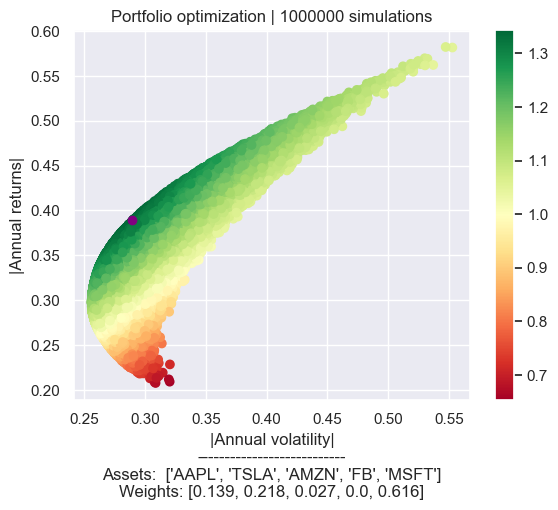

In [107]:
simul = 1000000
port = portfolios_simulations(log_ret,tickers,simul)
max_sharpe = port[port['Sharpe'] == port['Sharpe'].max()]
fig = plot_portfolios(port,max_sharpe,tickers)

El gráfico anterior es un gráfico de formato (x,y) donde  se simularon 1 millón de distintas combinaciones para los pesos de los activos, los retornos anuales esperados son la variable dependiente (y) y la volatilidad anual de los portafolios simulados es la variables inpedependiete (y). La barra de color al costado derecho del gráfico el ratio de sharpe de cada portafolio, donde se aplica una escala de color rojo - amarillo - verde, pintandose de rojo los portafolios con menor ratio de sharpe, amarillo los portafolios con ratio de sharpe intermedio y de de verde los portafolios con mayor ratio de sharpe.

Por otro lado, el punto morado representa el portafolio óptimo que calculamos anteriormente, y como se puede apreciar que este portafolio se ubica donde el color verde es más intenso, por lo que efectivamente es el portafolio con el mayor ratio de sharpe.